# Prediccion Gasto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_categorizado = pd.read_csv('movimientos_categorizados.csv')

In [3]:
df_gasto = df_categorizado[df_categorizado['tipo'] == 'gasto'].copy()
gastos_mensuales = df_gasto.groupby(['año_mes', 'categoria'])['importe'].sum().unstack(fill_value=0)
display(gastos_mensuales)

categoria,Compras no esenciales,Facturas,Gastos extraordinarios,Ingreso,Ocio / Suscripciones,Préstamo,Restauración,Supermercado,Transferencia personal,Transporte
año_mes,,,,,,,,,,
2021-09,51.08,0.00,0.00,200.0,4.99,0.00,49.21,0.00,6.00,34.70
2021-10,0.00,0.00,0.00,0.0,0.00,0.00,32.95,0.00,29.90,48.45
2021-11,2.45,164.99,0.00,0.0,29.41,0.00,67.95,17.90,5.00,165.25
2021-12,12.30,143.04,70.49,20.0,4.99,0.00,105.97,157.68,8.05,120.90
2022-01,45.98,143.05,0.00,0.0,28.95,0.00,114.27,54.33,0.00,64.87
2022-02,0.00,166.40,0.00,0.0,32.55,0.00,94.21,175.35,0.00,98.25
2022-03,0.00,275.14,797.03,110.0,13.98,0.00,66.05,83.89,15.50,105.00
2022-04,66.18,275.14,241.39,0.0,13.98,0.00,44.52,47.02,5.00,110.47
2022-05,6.19,156.00,0.00,0.0,13.98,0.00,96.85,102.41,0.00,57.84


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
22:33:07 - cmdstanpy - INFO - Chain [1] start processing
22:33:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wil

MAE (hasta 2024-12): 59.65 €


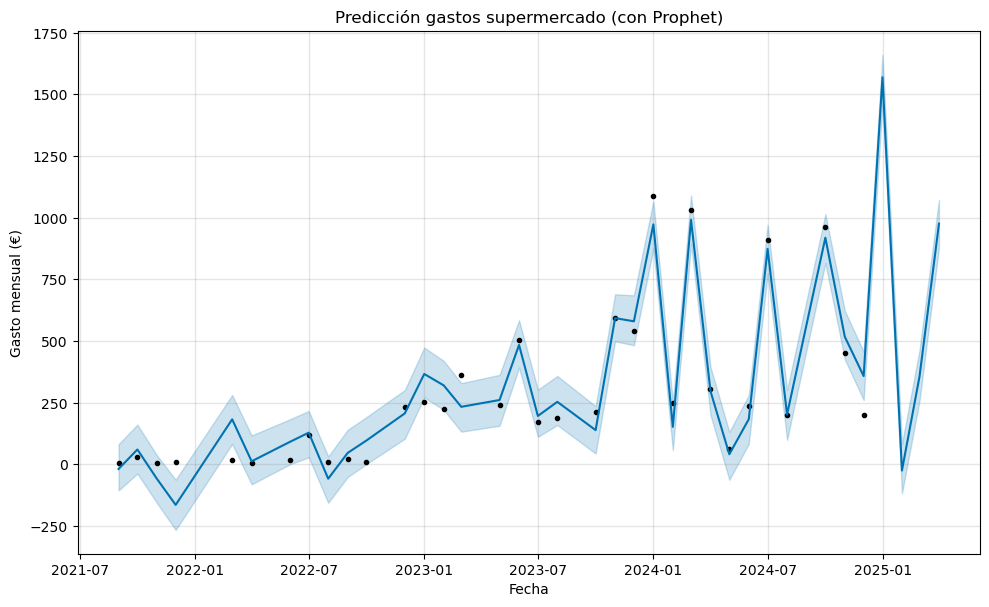

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

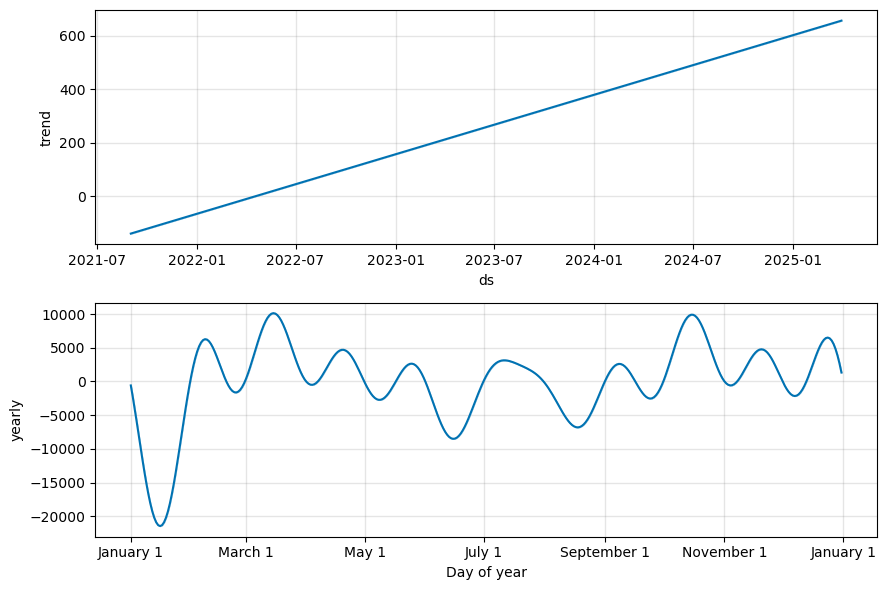

In [4]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# ========================
# 1. Filtrar la categoría
# ========================
df_super = df_categorizado[df_categorizado['categoria'] == 'Transferencia personal'].copy()
df_super['fecha'] = pd.to_datetime(df_super['fecha_operacion'])

# =========================
# 2. Agrupar por mes
# =========================
serie_mensual = df_super.groupby(df_super['fecha'].dt.to_period('M'))['importe'].sum().reset_index()
serie_mensual['fecha'] = serie_mensual['fecha'].dt.to_timestamp()

# =========================
# 3. Preparar para Prophet
# =========================
df_prophet = serie_mensual.rename(columns={'fecha': 'ds', 'importe': 'y'})

# Entrenamos solo hasta dic-2024
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31']

# =========================
# 4. Crear y entrenar modelo
# =========================
modelo = Prophet()
modelo.fit(df_entrenamiento)

# =========================
# 5. Predecir 4 meses extra
# =========================
futuro = modelo.make_future_dataframe(periods=4, freq='ME')
forecast = modelo.predict(futuro)

# =========================
# 6. Evaluar precisión
# =========================
# Comparar predicción con datos reales (hasta 2024-12)
hist = forecast.set_index('ds').loc[df_entrenamiento['ds']]
y_pred = hist['yhat']
y_true = df_entrenamiento.set_index('ds')['y']
mae = mean_absolute_error(y_true, y_pred)
print(f"MAE (hasta 2024-12): {mae:.2f} €")

# =========================
# 7. Visualizar predicción completa
# =========================
modelo.plot(forecast)
plt.title("Predicción gastos supermercado (con Prophet)")
plt.xlabel("Fecha")
plt.ylabel("Gasto mensual (€)")
plt.grid(True)
plt.show()

# =========================
# 8. Visualizar componentes
# =========================
modelo.plot_components(forecast)
plt.show()


22:33:08 - cmdstanpy - INFO - Chain [1] start processing
22:33:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\4279741430.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


✅ MAE entrenamiento (hasta 2024-12): 59.65 €

✅ MAE Prophet para valores reales en 2025: 256.12 €



,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,-25.56,-124.05,71.61,402.5
1,2025-02-01,355.99,254.35,448.91,409.0
2,2025-03-01,975.68,877.96,1066.43,688.4


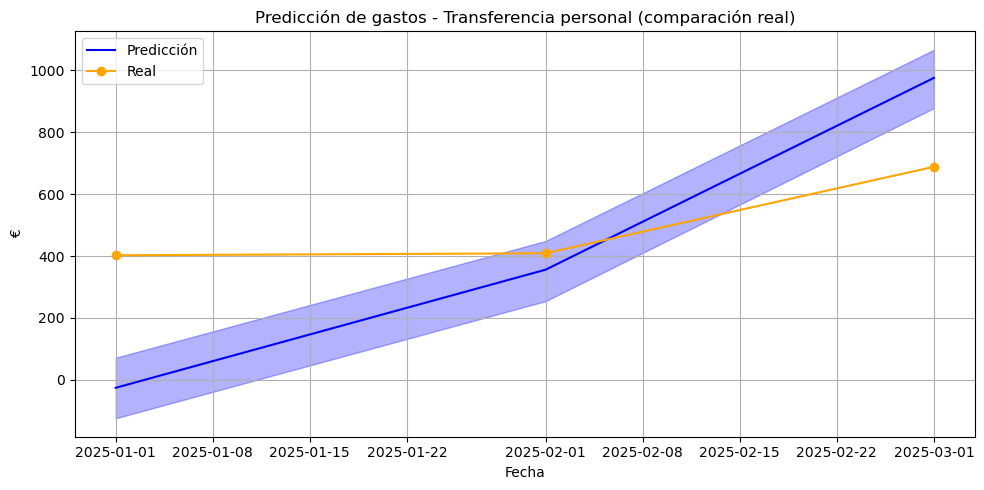

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


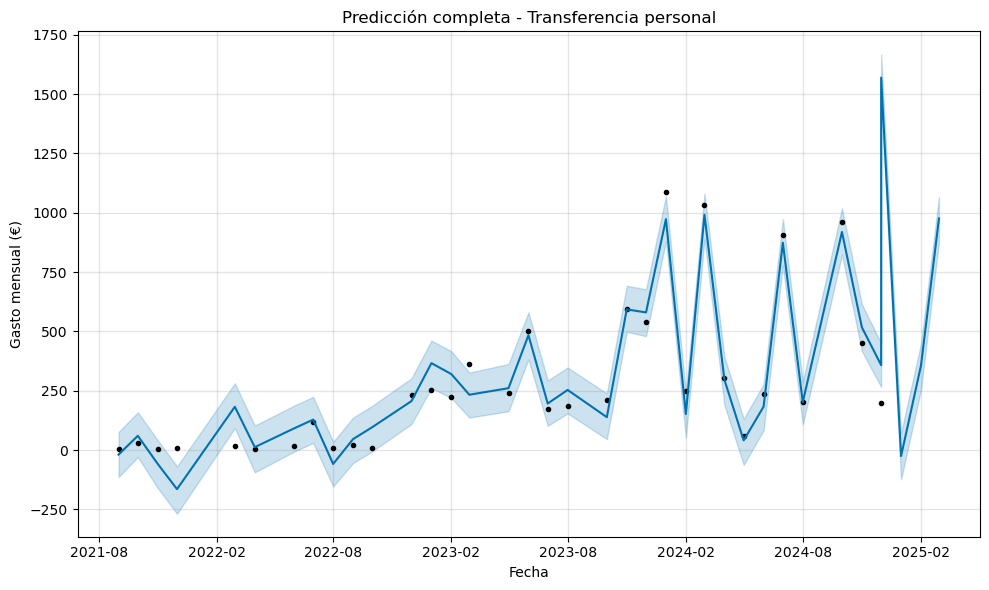

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

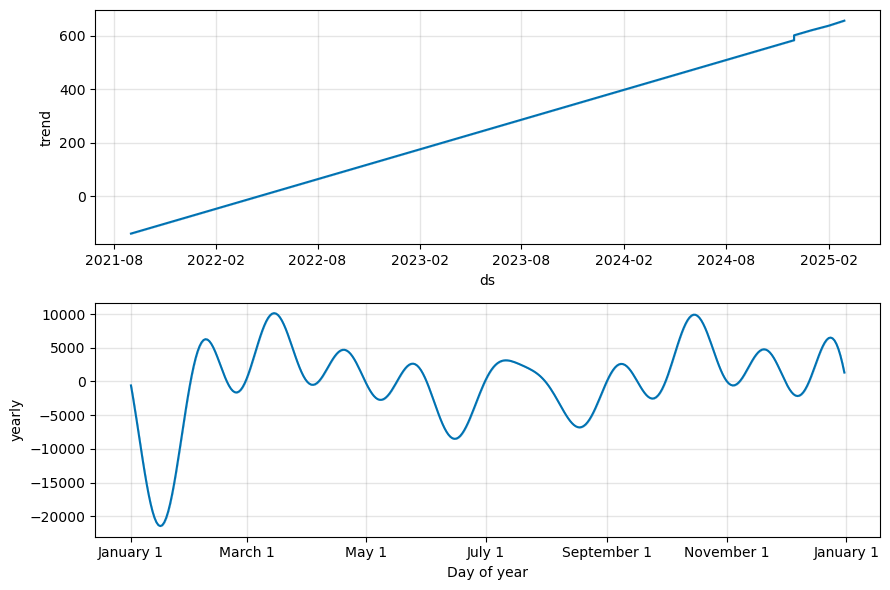

In [5]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from IPython.display import display

# ========================
# 1. Filtrar la categoría
# ========================
df_super = df_categorizado[df_categorizado['categoria'] == 'Transferencia personal'].copy()
df_super['fecha'] = pd.to_datetime(df_super['fecha_operacion'])

# =========================
# 2. Agrupar por mes
# =========================
serie_mensual = df_super.groupby(df_super['fecha'].dt.to_period('M'))['importe'].sum().reset_index()
serie_mensual['fecha'] = serie_mensual['fecha'].dt.to_timestamp()

# =========================
# 3. Preparar para Prophet
# =========================
df_prophet = serie_mensual.rename(columns={'fecha': 'ds', 'importe': 'y'})
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31']
df_real = df_prophet[df_prophet['ds'] > '2024-12-31']

# =========================
# 4. Crear y entrenar modelo
# =========================
modelo = Prophet()
modelo.fit(df_entrenamiento)

# =========================
# 5. Predecir 4 meses extra
# =========================
futuro = modelo.make_future_dataframe(periods=4, freq='M')
forecast = modelo.predict(futuro)

# =========================
# 6. Evaluar precisión (entrenamiento)
# =========================
hist = forecast.set_index('ds').loc[df_entrenamiento['ds']]
y_pred = hist['yhat']
y_true = df_entrenamiento.set_index('ds')['y']
mae = mean_absolute_error(y_true, y_pred)
print(f"✅ MAE entrenamiento (hasta 2024-12): {mae:.2f} €")

# =========================
# 7. Comparación con datos reales en 2025
# =========================
# Normalizar fechas
forecast['ds'] = forecast['ds'].dt.to_period('M').dt.to_timestamp()
df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()

# Combinar predicciones con valores reales
forecast_2025 = forecast[forecast['ds'].isin(df_real['ds'])].copy()
forecast_2025 = forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2025 = forecast_2025.merge(df_real[['ds', 'y']], on='ds', how='left')

# Formatear tabla
forecast_2025 = forecast_2025.rename(columns={
    'ds': 'Fecha',
    'yhat': 'Predicción (€)',
    'y': 'Real (€)',
    'yhat_lower': 'Límite inferior (€)',
    'yhat_upper': 'Límite superior (€)'
})
forecast_2025 = forecast_2025.round(2)

# Mostrar tabla si hay datos
if not forecast_2025.empty:
    mae_2025 = mean_absolute_error(forecast_2025['Real (€)'], forecast_2025['Predicción (€)'])
    print(f"\n✅ MAE Prophet para valores reales en 2025: {mae_2025:.2f} €\n")
    display(forecast_2025)

    # =========================
    # 8. Gráfico comparativo con valores reales
    # =========================
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_2025['Fecha'], forecast_2025['Predicción (€)'], label='Predicción', color='blue')
    plt.fill_between(forecast_2025['Fecha'],
                     forecast_2025['Límite inferior (€)'],
                     forecast_2025['Límite superior (€)'],
                     alpha=0.3, color='blue')
    plt.plot(forecast_2025['Fecha'], forecast_2025['Real (€)'], label='Real', marker='o', color='orange')
    plt.title("Predicción de gastos - Transferencia personal (comparación real)")
    plt.xlabel("Fecha")
    plt.ylabel("€")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# 9. Visualizar predicción completa
# =========================
fig1 = modelo.plot(forecast)
plt.title("Predicción completa - Transferencia personal")
plt.xlabel("Fecha")
plt.ylabel("Gasto mensual (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================
# 10. Visualizar componentes
# =========================
fig2 = modelo.plot_components(forecast)
plt.tight_layout()
plt.show()


22:33:09 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Transferencia personal


22:33:10 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 59.65 €
✅ MAE Prophet para valores reales en 2025: 256.12 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,-25.56,-118.58,72.89,402.5
1,2025-02-01,355.99,257.79,451.22,409.0
2,2025-03-01,975.68,879.99,1079.04,688.4


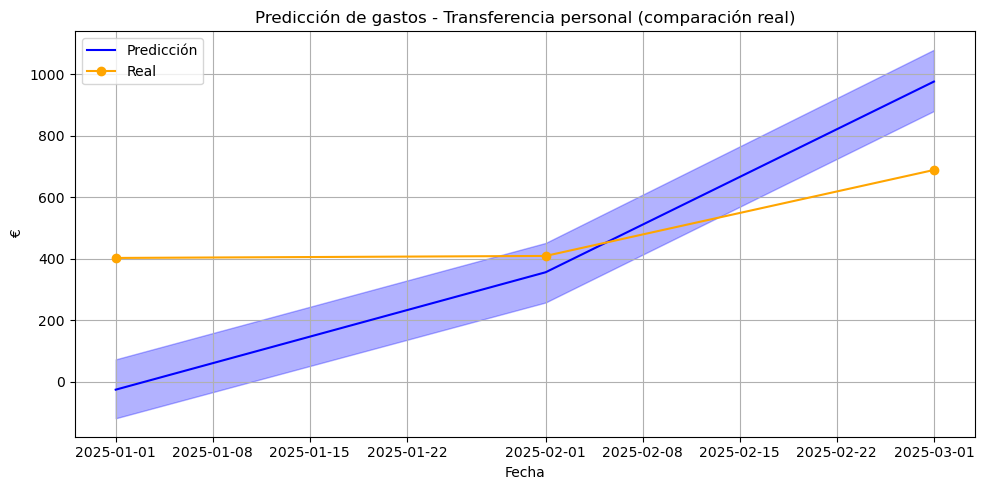

22:33:10 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Compras no esenciales


22:33:10 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 26.25 €
✅ MAE Prophet para valores reales en 2025: 142.16 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,190.60,141.00,243.83,68.23
1,2025-02-01,150.28,100.70,197.46,55.99
2,2025-03-01,262.70,216.28,309.54,52.89


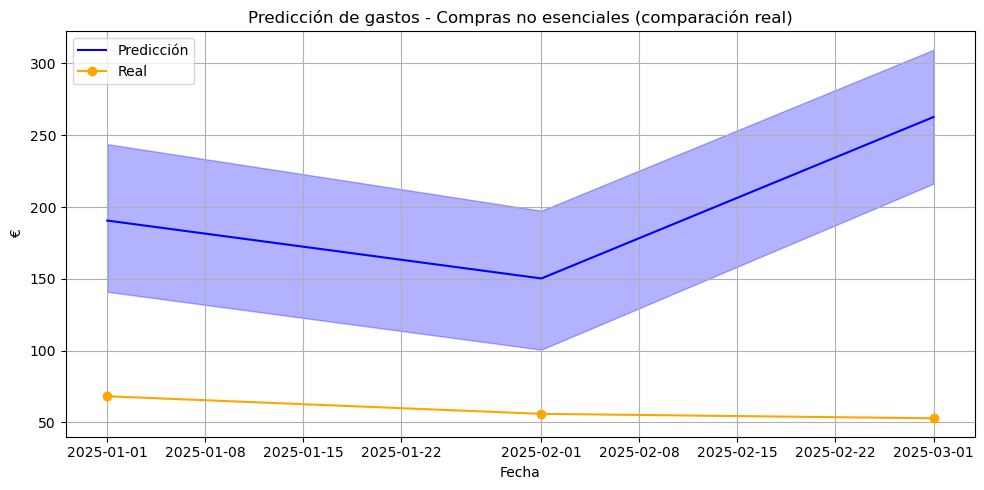

22:33:10 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Facturas


22:33:11 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 40.95 €
✅ MAE Prophet para valores reales en 2025: 131.70 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,233.39,157.81,305.50,314.81
1,2025-02-01,118.29,46.37,194.58,384.69
2,2025-03-01,225.49,152.84,298.07,178.20


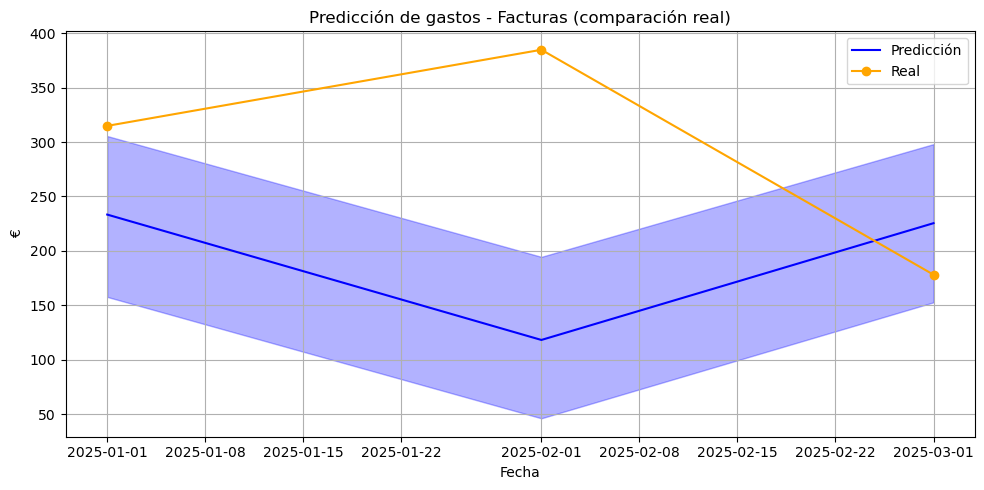

22:33:11 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Préstamo
⚠️ No hay suficientes datos para entrenar Prophet.

🔎 Categoría: Ocio / Suscripciones


22:33:11 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 16.24 €
✅ MAE Prophet para valores reales en 2025: 57.18 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,48.97,25.03,72.97,62.95
1,2025-02-01,126.29,101.48,149.79,52.96
2,2025-03-01,137.20,112.64,160.72,52.96


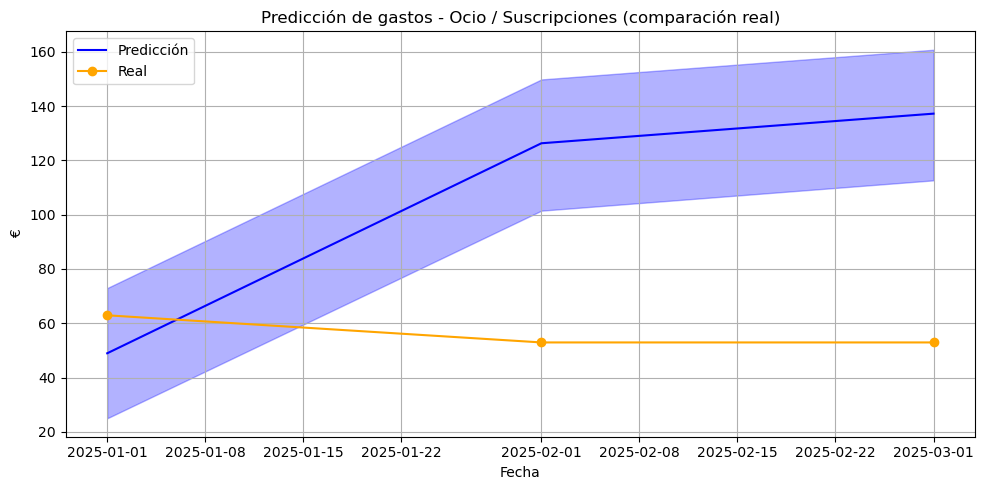

22:33:12 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Restauración


22:33:12 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 35.67 €
✅ MAE Prophet para valores reales en 2025: 85.16 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,180.43,126.27,234.23,71.03
1,2025-02-01,216.40,156.85,271.02,185.12
2,2025-03-01,126.60,73.35,179.59,241.40


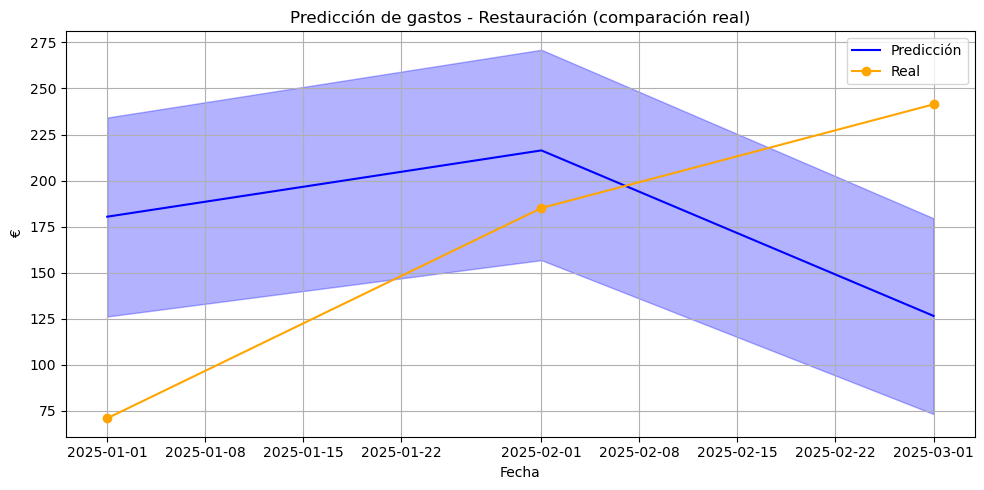

22:33:12 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Supermercado


22:33:12 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 48.87 €
✅ MAE Prophet para valores reales en 2025: 129.41 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,379.30,295.39,458.42,409.45
1,2025-02-01,303.95,223.69,387.43,249.23
2,2025-03-01,624.70,542.39,701.32,321.33


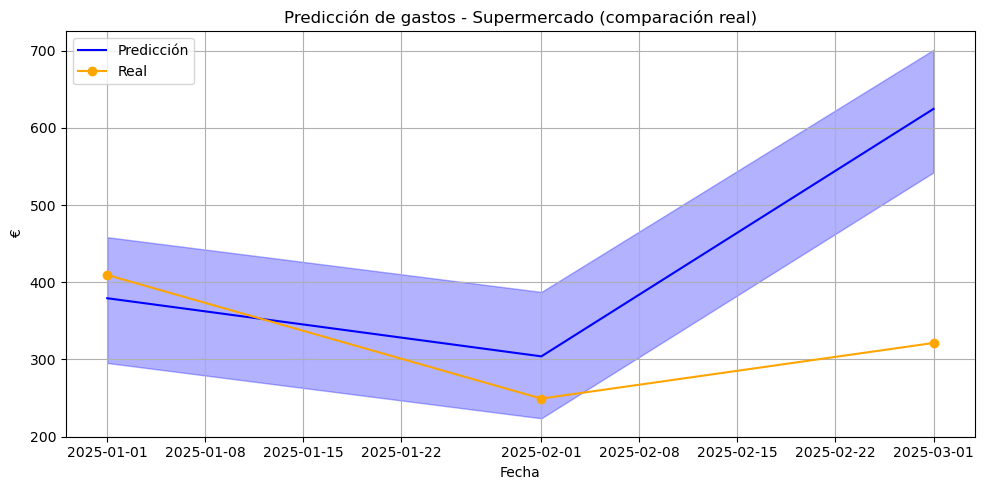

22:33:13 - cmdstanpy - INFO - Chain [1] start processing



🔎 Categoría: Transporte


22:33:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


✅ MAE entrenamiento (hasta 2024-12): 27.96 €
✅ MAE Prophet para valores reales en 2025: 57.14 €


C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\2354274889.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,108.69,64.59,153.68,33.25
1,2025-02-01,129.49,85.52,174.06,74.14
2,2025-03-01,19.37,-24.51,61.53,60.00


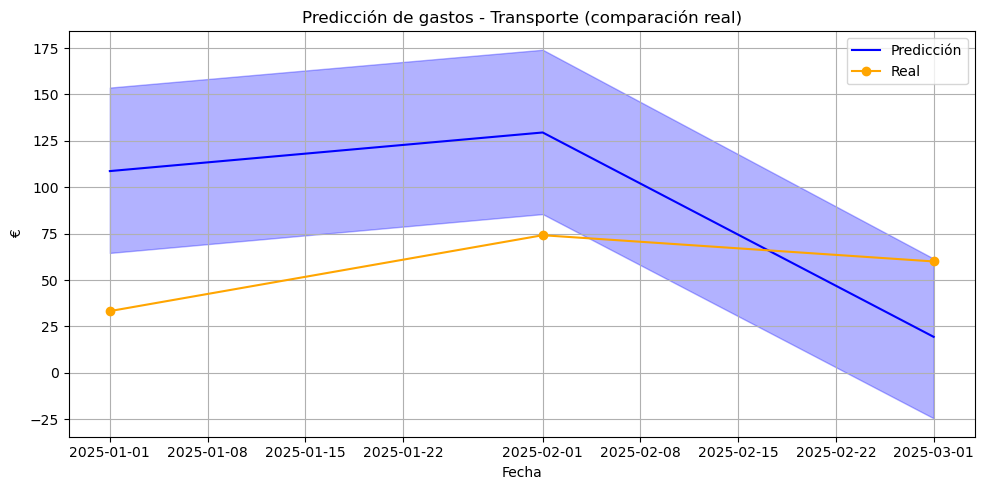

In [6]:
def predecir_categoria_con_prophet(categoria):
    print(f"\n{'='*50}\n🔎 Categoría: {categoria}\n{'='*50}")
    
    df = df_categorizado.copy()
    df_cat = df[df['categoria'] == categoria].copy()
    df_cat['fecha'] = pd.to_datetime(df_cat['fecha_operacion'])

    serie_mensual = df_cat.groupby(df_cat['fecha'].dt.to_period('M'))['importe'].sum().reset_index()
    serie_mensual['fecha'] = serie_mensual['fecha'].dt.to_timestamp()
    df_prophet = serie_mensual.rename(columns={'fecha': 'ds', 'importe': 'y'})

    if df_prophet.shape[0] < 12:
        print("⚠️ No hay suficientes datos para entrenar Prophet.")
        return

    df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31']
    df_real = df_prophet[df_prophet['ds'] > '2024-12-31']

    modelo = Prophet()
    modelo.fit(df_entrenamiento)

    futuro = modelo.make_future_dataframe(periods=4, freq='M')
    forecast = modelo.predict(futuro)

    hist = forecast.set_index('ds').loc[df_entrenamiento['ds']]
    y_pred = hist['yhat']
    y_true = df_entrenamiento.set_index('ds')['y']
    mae_entreno = mean_absolute_error(y_true, y_pred)
    print(f"✅ MAE entrenamiento (hasta 2024-12): {mae_entreno:.2f} €")

    forecast['ds'] = forecast['ds'].dt.to_period('M').dt.to_timestamp()
    df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()

    forecast_2025 = forecast[forecast['ds'].isin(df_real['ds'])].copy()
    forecast_2025 = forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_2025 = forecast_2025.merge(df_real[['ds', 'y']], on='ds', how='left')

    forecast_2025 = forecast_2025.rename(columns={
        'ds': 'Fecha',
        'yhat': 'Predicción (€)',
        'y': 'Real (€)',
        'yhat_lower': 'Límite inferior (€)',
        'yhat_upper': 'Límite superior (€)'
    }).round(2)

    if not forecast_2025.empty:
        mae_2025 = mean_absolute_error(forecast_2025['Real (€)'], forecast_2025['Predicción (€)'])
        print(f"✅ MAE Prophet para valores reales en 2025: {mae_2025:.2f} €")
        display(forecast_2025)

        plt.figure(figsize=(10, 5))
        plt.plot(forecast_2025['Fecha'], forecast_2025['Predicción (€)'], label='Predicción', color='blue')
        plt.fill_between(forecast_2025['Fecha'],
                         forecast_2025['Límite inferior (€)'],
                         forecast_2025['Límite superior (€)'],
                         alpha=0.3, color='blue')
        plt.plot(forecast_2025['Fecha'], forecast_2025['Real (€)'], label='Real', marker='o', color='orange')
        plt.title(f"Predicción de gastos - {categoria} (comparación real)")
        plt.xlabel("Fecha")
        plt.ylabel("€")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

predecir_categoria_con_prophet('Transferencia personal')
predecir_categoria_con_prophet('Compras no esenciales')
predecir_categoria_con_prophet('Facturas')
predecir_categoria_con_prophet('Préstamo')
predecir_categoria_con_prophet('Ocio / Suscripciones')
predecir_categoria_con_prophet('Restauración')
predecir_categoria_con_prophet('Supermercado')
predecir_categoria_con_prophet('Transporte')

# 

22:33:13 - cmdstanpy - INFO - Chain [1] start processing
22:33:13 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE entrenamiento (hasta 2024-12): 74.56 €
✅ MAE para 2025: 143.52 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\3354542756.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,631.13,501.88,764.15,402.5
1,2025-02-01,366.97,246.95,487.60,409.0
2,2025-03-01,848.29,728.23,973.74,688.4


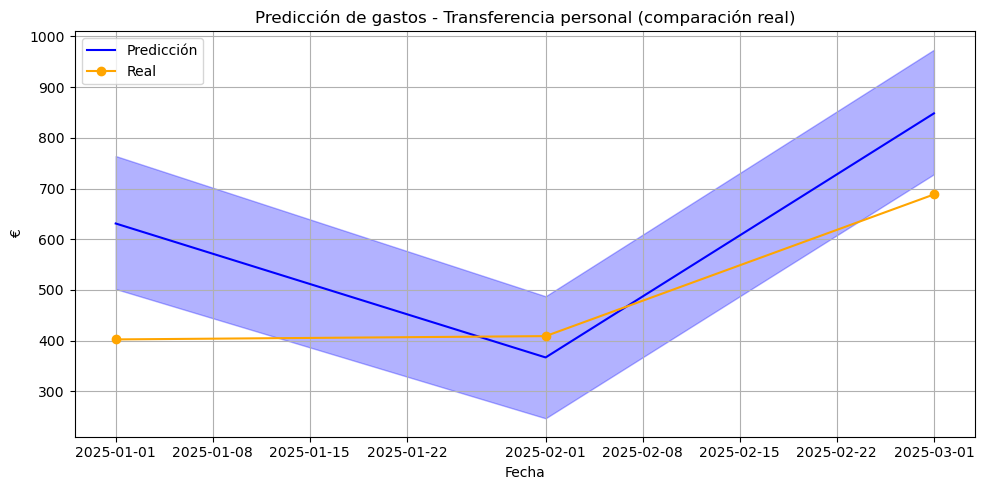

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

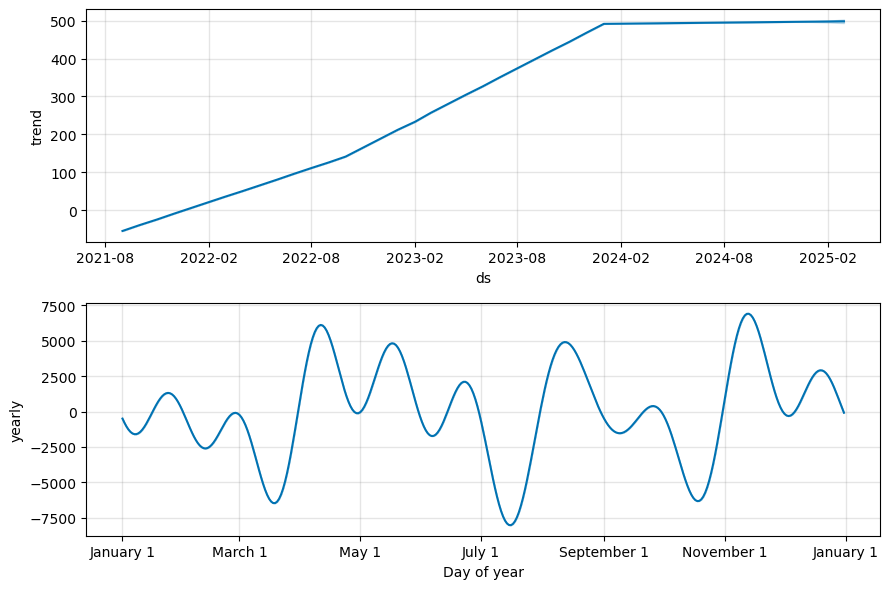

In [7]:
import matplotlib.pyplot as plt # ESTE ES EL QUE MEJOR HA FUNCIONADO
from IPython.display import display
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Preparación de los datos (añade esto ANTES del modelo)
categoria = 'Transferencia personal'  # O la categoría que quieras analizar
df_cat = df_categorizado[df_categorizado['categoria'] == categoria].copy()
df_cat['fecha'] = pd.to_datetime(df_cat['fecha_operacion'])

# Agrupar por mes
serie_mensual = df_cat.groupby(df_cat['fecha'].dt.to_period('M'))['importe'].sum().reset_index()
serie_mensual['fecha'] = serie_mensual['fecha'].dt.to_timestamp()
df_prophet = serie_mensual.rename(columns={'fecha': 'ds', 'importe': 'y'})

# Asegurar que las fechas están al final de mes
df_prophet['ds'] = df_prophet['ds'] + pd.offsets.MonthEnd(0)

# Dividir entrenamiento y prueba
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31']

# Usar los mejores hiperparámetros encontrados
modelo = Prophet(
    seasonality_mode='additive',         # ← cambia esto con tus mejores resultados
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    changepoint_range=0.7,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Reutilizar los datos de la Parte 1
modelo.fit(df_entrenamiento)
futuro = modelo.make_future_dataframe(periods=3, freq='M')
forecast = modelo.predict(futuro)

# Evaluar entrenamiento
hist = forecast.set_index('ds').loc[df_entrenamiento['ds']]
y_pred = hist['yhat']
y_true = df_entrenamiento.set_index('ds')['y']
mae = mean_absolute_error(y_true, y_pred)
print(f"✅ MAE entrenamiento (hasta 2024-12): {mae:.2f} €")

# Comparación con 2025
df_real = df_prophet[df_prophet['ds'] > '2024-12-31']
forecast['ds'] = forecast['ds'].dt.to_period('M').dt.to_timestamp()
df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()

forecast_2025 = forecast[forecast['ds'].isin(df_real['ds'])].copy()
forecast_2025 = forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_2025 = forecast_2025.merge(df_real[['ds', 'y']], on='ds', how='left')
forecast_2025 = forecast_2025.rename(columns={
    'ds': 'Fecha',
    'yhat': 'Predicción (€)',
    'y': 'Real (€)',
    'yhat_lower': 'Límite inferior (€)',
    'yhat_upper': 'Límite superior (€)'
}).round(2)

if not forecast_2025.empty:
    mae_2025 = mean_absolute_error(forecast_2025['Real (€)'], forecast_2025['Predicción (€)'])
    print(f"✅ MAE para 2025: {mae_2025:.2f} €")
    display(forecast_2025)

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_2025['Fecha'], forecast_2025['Predicción (€)'], label='Predicción', color='blue')
    plt.fill_between(forecast_2025['Fecha'],
                     forecast_2025['Límite inferior (€)'],
                     forecast_2025['Límite superior (€)'],
                     alpha=0.3, color='blue')
    plt.plot(forecast_2025['Fecha'], forecast_2025['Real (€)'], label='Real', marker='o', color='orange')
    plt.title(f"Predicción de gastos - {categoria} (comparación real)")
    plt.xlabel("Fecha")
    plt.ylabel("€")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Componentes del modelo
modelo.plot_components(forecast)
plt.tight_layout()
plt.show()


In [ ]:
"""" 
ÚLTIMO USADO
"""

from prophet import Prophet 
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

def entrenar_y_predecir_categoria(df_categorizado, categoria, parametros=None):
    """
    Entrena un modelo Prophet para una categoría específica y muestra predicción vs. valores reales.

    Parámetros:
    - df_categorizado: DataFrame con las columnas 'fecha_operacion', 'importe', 'categoria'.
    - categoria: str, nombre de la categoría a analizar.
    - parametros: dict con hiperparámetros de Prophet. Si es None, se usa el conjunto por defecto.

    Devuelve:
    - forecast_2025: DataFrame con las predicciones y valores reales de 2025.
    """

    # Filtrar y preparar datos
    df_cat = df_categorizado[df_categorizado['categoria'] == categoria].copy()
    df_cat['fecha'] = pd.to_datetime(df_cat['fecha_operacion'])

    serie_mensual = df_cat.groupby(df_cat['fecha'].dt.to_period('M'))['importe'].sum().reset_index()
    serie_mensual['fecha'] = serie_mensual['fecha'].dt.to_timestamp()
    df_prophet = serie_mensual.rename(columns={'fecha': 'ds', 'importe': 'y'})
    df_prophet['ds'] = df_prophet['ds'] + pd.offsets.MonthEnd(0)

    # División entrenamiento y prueba
    df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31']

    # Parámetros Prophet
    if parametros is None:
        parametros = {
            'seasonality_mode': 'additive',
            'changepoint_prior_scale': 0.5,
            'seasonality_prior_scale': 10.0,
            'changepoint_range': 0.7,
            'yearly_seasonality': True,
            'weekly_seasonality': False,
            'daily_seasonality': False
        }

    modelo = Prophet(**parametros)
    modelo.fit(df_entrenamiento)
    futuro = modelo.make_future_dataframe(periods=4, freq='M')
    forecast = modelo.predict(futuro)

    # Evaluación en entrenamiento
    hist = forecast.set_index('ds').loc[df_entrenamiento['ds']]
    y_pred = hist['yhat']
    y_true = df_entrenamiento.set_index('ds')['y']
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n Categoría: {categoria}")
    print(f"✅ MAE entrenamiento (hasta 2024-12): {mae:.2f} €")

    # Predicción y comparación con datos reales (2025)
    df_real = df_prophet[df_prophet['ds'] > '2024-12-31']
    forecast['ds'] = forecast['ds'].dt.to_period('M').dt.to_timestamp()
    df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()

    forecast_2025 = forecast[forecast['ds'].isin(df_real['ds'])].copy()
    forecast_2025 = forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_2025 = forecast_2025.merge(df_real[['ds', 'y']], on='ds', how='left')
    forecast_2025 = forecast_2025.rename(columns={
        'ds': 'Fecha',
        'yhat': 'Predicción (€)',
        'y': 'Real (€)',
        'yhat_lower': 'Límite inferior (€)',
        'yhat_upper': 'Límite superior (€)'
    }).round(2)

    if not forecast_2025.empty:
        mae_2025 = mean_absolute_error(forecast_2025['Real (€)'], forecast_2025['Predicción (€)'])
        print(f"✅ MAE para 2025: {mae_2025:.2f} €")
        display(forecast_2025)

    # 📈 Gráfico completo desde el inicio
    plt.figure(figsize=(10, 5))
    plt.plot(df_prophet['ds'], df_prophet['y'], label='Real', marker='o', color='orange')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='blue')
    plt.fill_between(forecast['ds'],
                     forecast['yhat_lower'],
                     forecast['yhat_upper'],
                     alpha=0.3, color='blue')
    plt.title(f"Predicción de gastos - {categoria}")
    plt.xlabel("Fecha")
    plt.ylabel("€")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Componentes del modelo
    return forecast_2025


22:33:14 - cmdstanpy - INFO - Chain [1] start processing
22:33:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



📊 Categoría: Supermercado
✅ MAE entrenamiento (hasta 2024-12): 39.68 €
✅ MAE para 2025: 172.32 €


C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,226.20,159.91,284.67,409.45
1,2025-02-01,424.25,360.48,486.70,249.23
2,2025-03-01,510.40,442.70,582.81,321.33
3,2025-04-01,436.26,376.08,497.94,294.30


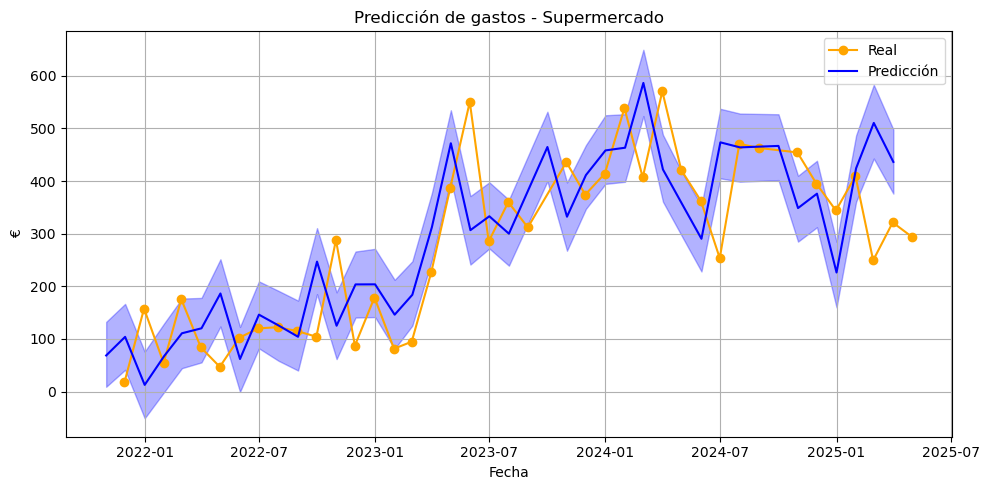

22:33:15 - cmdstanpy - INFO - Chain [1] start processing
22:33:15 - cmdstanpy - INFO - Chain [1] done processing



📊 Categoría: Compras no esenciales
✅ MAE entrenamiento (hasta 2024-12): 22.92 €
✅ MAE para 2025: 196.49 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,340.35,300.34,382.18,68.23
1,2025-02-01,256.92,214.26,296.02,55.99
2,2025-03-01,269.09,229.93,308.60,52.89
3,2025-04-01,281.32,242.25,324.57,184.63


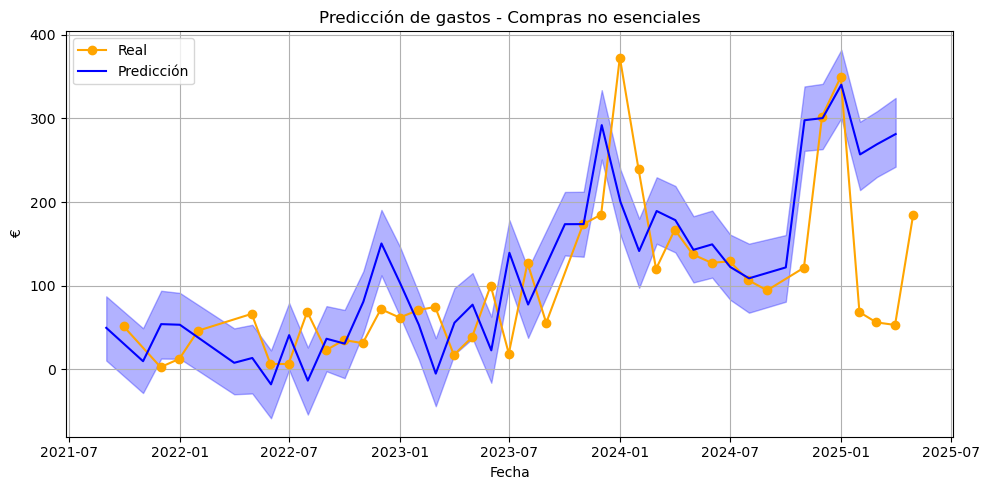

22:33:15 - cmdstanpy - INFO - Chain [1] start processing
22:33:16 - cmdstanpy - INFO - Chain [1] done processing



📊 Categoría: Transferencia personal
✅ MAE entrenamiento (hasta 2024-12): 74.56 €
✅ MAE para 2025: 199.79 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,631.13,505.46,749.43,402.5
1,2025-02-01,366.97,240.86,479.08,409.0
2,2025-03-01,848.29,730.75,977.20,688.4
3,2025-04-01,378.62,262.75,506.52,10.0


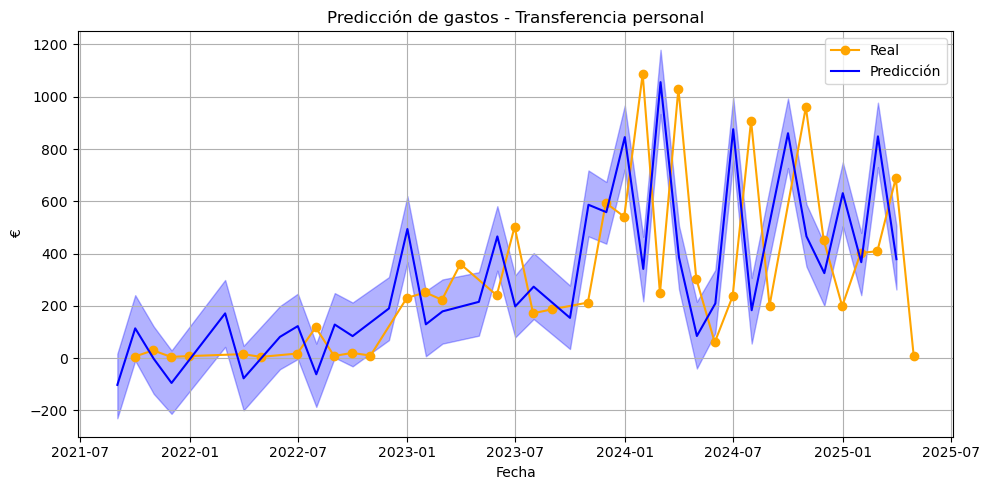

22:33:16 - cmdstanpy - INFO - Chain [1] start processing
22:33:16 - cmdstanpy - INFO - Chain [1] done processing



📊 Categoría: Facturas
✅ MAE entrenamiento (hasta 2024-12): 38.75 €
✅ MAE para 2025: 162.66 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,113.71,35.40,188.89,314.81
1,2025-02-01,218.71,150.14,294.22,384.69
2,2025-03-01,371.14,296.81,442.83,178.20
3,2025-04-01,268.84,198.62,341.18,178.20


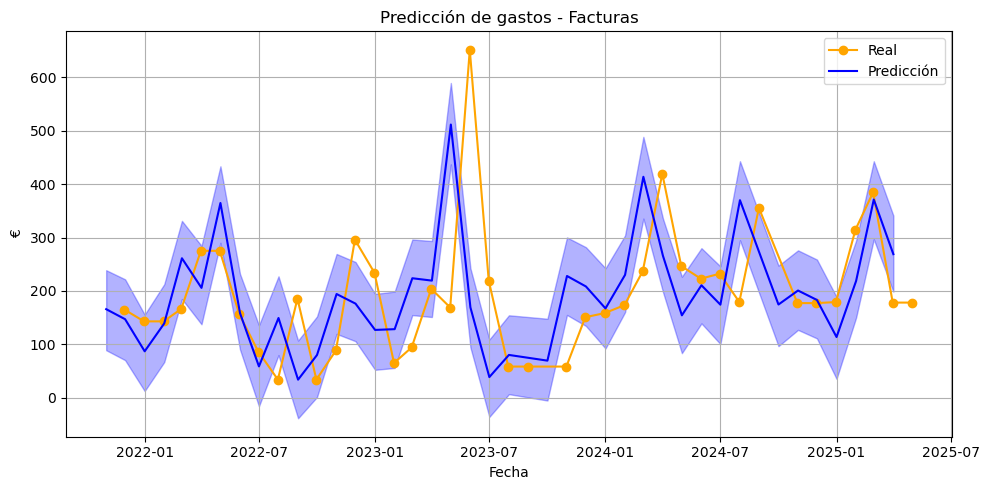


📊 Categoría: Préstamo
✅ MAE entrenamiento (hasta 2024-12): 0.00 €
✅ MAE para 2025: 197.19 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,394.38,394.38,394.38,197.19
1,2025-02-01,394.38,394.38,394.38,197.19
2,2025-03-01,394.38,394.38,394.38,197.19
3,2025-04-01,394.38,394.38,394.38,197.19


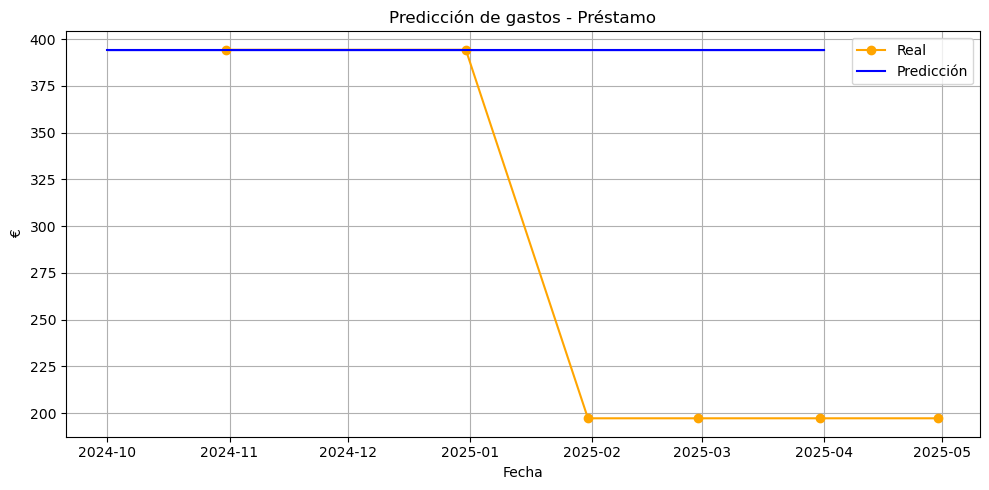

22:33:17 - cmdstanpy - INFO - Chain [1] start processing
22:33:17 - cmdstanpy - INFO - Chain [1] done processing



📊 Categoría: Ocio / Suscripciones
✅ MAE entrenamiento (hasta 2024-12): 11.64 €
✅ MAE para 2025: 65.66 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,152.62,136.01,170.90,62.95
1,2025-02-01,97.33,78.84,116.34,52.96
2,2025-03-01,107.68,89.01,124.63,52.96
3,2025-04-01,93.35,75.82,112.82,19.47


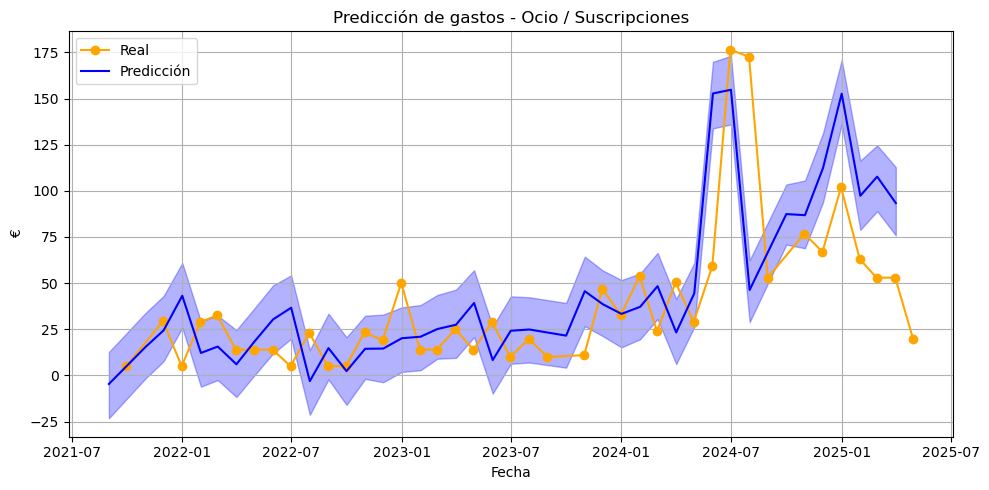

22:33:18 - cmdstanpy - INFO - Chain [1] start processing
22:33:18 - cmdstanpy - INFO - Chain [1] done processing



📊 Categoría: Restauración
✅ MAE entrenamiento (hasta 2024-12): 23.28 €
✅ MAE para 2025: 98.18 €


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Gamer\AppData\Local\Temp\ipykernel_3156\1114577069.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['ds'] = df_real['ds'].dt.to_period('M').dt.to_timestamp()


,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,282.97,245.23,320.81,71.03
1,2025-02-01,198.10,162.49,236.46,185.12
2,2025-03-01,150.20,110.99,188.03,241.40
3,2025-04-01,207.13,169.26,250.23,130.52


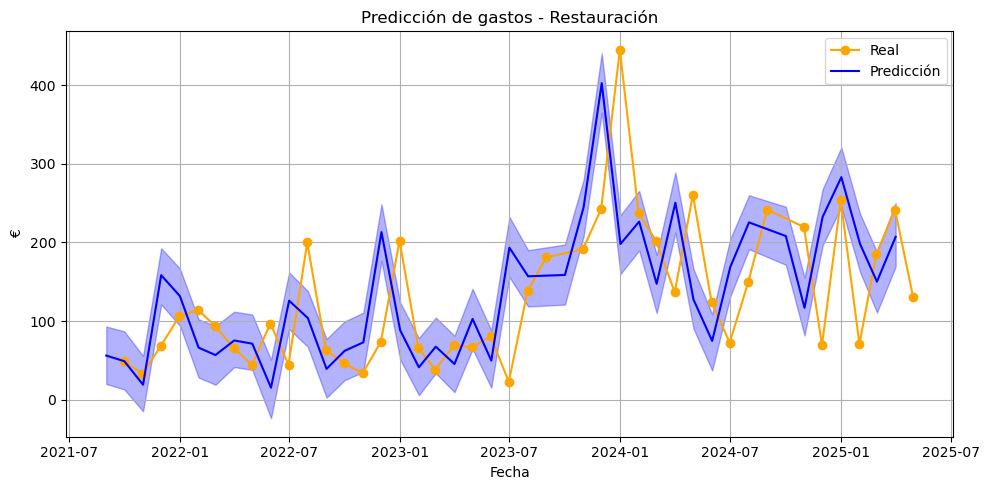

,Fecha,Predicción (€),Límite inferior (€),Límite superior (€),Real (€)
0,2025-01-01,282.97,245.23,320.81,71.03
1,2025-02-01,198.10,162.49,236.46,185.12
2,2025-03-01,150.20,110.99,188.03,241.40
3,2025-04-01,207.13,169.26,250.23,130.52


In [9]:
entrenar_y_predecir_categoria(df_categorizado, 'Supermercado')
entrenar_y_predecir_categoria(df_categorizado, 'Compras no esenciales')
entrenar_y_predecir_categoria(df_categorizado, 'Transferencia personal')
entrenar_y_predecir_categoria(df_categorizado, 'Facturas')
entrenar_y_predecir_categoria(df_categorizado, 'Préstamo')
entrenar_y_predecir_categoria(df_categorizado, 'Ocio / Suscripciones')
entrenar_y_predecir_categoria(df_categorizado, 'Restauración')

In [11]:
df_categorizado[df_categorizado['categoria'] == 'Préstamo']['importe'].max()


197.19

In [13]:
df_prestamo = df_categorizado[df_categorizado['categoria'] == 'Préstamo'].copy()
valor_maximo = df_prestamo['importe'].max()
fila_maxima = df_prestamo[df_prestamo['importe'] == valor_maximo]

print(f"Valor máximo: {valor_maximo:.2f} €")
display(fila_maxima[['fecha_operacion', 'importe']])


Valor máximo: 197.19 €


,fecha_operacion,importe
862,2025-04-01,197.19
912,2025-02-28,197.19
951,2025-01-31,197.19
1001,2024-12-31,197.19
1077,2024-12-02,197.19
1132,2024-10-31,197.19
1197,2024-10-01,197.19
2361,2025-03-31,197.19
